Image format: JPEG
Image mode: RGB
Image size: (400, 400)


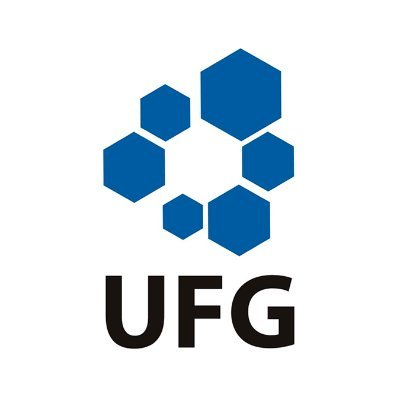

In [1]:
from PIL import Image

image = Image.open("ufg_logo.jpg")

print(f"Image format: {image.format}")
print(f"Image mode: {image.mode}")
print(f"Image size: {image.size}")

display(image)

In [2]:
width = 50
length = 50

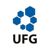

In [3]:
image = image.resize((width, length))
display(image)

In [4]:
import numpy as np
# Convert the image to a NumPy array
pixel_array = np.array(image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

Shape of pixel_array: (50, 50, 3)


In [5]:
pixel_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Shape of pixel_array: (50, 50)


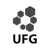

In [6]:
# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the grayscale image to a NumPy array
pixel_array = np.array(gray_image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

# Display the resized image in the notebook
display(gray_image)

In [7]:
width, length = pixel_array.shape
width, length

(50, 50)

In [8]:
def generate_random_individual(width, length):
    size = width * length
    binary_numbers = np.random.randint(0, 2, size=(size, 8), dtype=np.uint8) #binary number str
    binary_representation = ''.join(binary_numbers.ravel().astype(str))
    return binary_representation

In [9]:
individual = generate_random_individual(width, length)
individual

'001101010000111010000100010010111001011111001001010001000000101000001100001001001110011100100101101101101101110011100001101001101011010001111110100010011001101000101011100100101001110100001000010101001111100000101001111110011000001000000001001011101100011100110000101011101000010000001010101011101101000001110111101101111110111010101010010011000001000111100010010110110110010101111101101001110111010001010101011100011101110100110101001101010111011010110111110100010100110011000011111011001101011001101010101011001110001110001010111101110110000111011010001011110100111111010100011100000100111100010001111101011011001010000110100101111010000011110000000100101101100110110000100110111110110100100100100101111000000000011010111010100110011110000110000011100001100001111000111010100111110001111110000011001110101000010011111010110101100001010101100101100100000111110110101011100100110101011110101001000101111101101110111010111100100110100111010100111011110111011101001110001010010011001000100011110110100

In [10]:
import numpy as np

def individual_to_array(binary_representation, width, length):
    size = width * length
    binary_length = 8
    assert len(binary_representation) == size * binary_length, "Invalid binary representation length"

    # Split the binary string into 8-character chunks
    binary_chunks = [binary_representation[i:i+binary_length] for i in range(0, size * binary_length, binary_length)]

    # Convert binary chunks to integers using int('11111111', 2)
    integers = [int(chunk, 2) for chunk in binary_chunks]

    # Create a numpy array from the integers
    array = np.array(integers, dtype=np.uint8).reshape(width, length)

    return array


In [11]:

binary_representation = generate_random_individual(width, length)
array = individual_to_array(individual, width, length)

In [12]:
def display_individual(individual):
    img = Image.fromarray(np.uint8(individual))
    display(img)

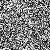

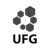

In [13]:
display_individual(array)
display_individual(pixel_array)

In [1]:
import numpy as np

def fitness_function(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    # Initialize the score to 0
    score = 0
    # Iterate over the elements of both arrays
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1

    return score

In [15]:
score = fitness_function(array, pixel_array)
print("Score:", score)

Score: 10


In [16]:
#TODO:
#Test altering the fitness function
#Rows and columns +20
# log(score) or exp(score)

In [17]:
def fitness_function2(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    score = 0

    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1
    # Check if entire rows match and increment the score by 20 points
    for i in range(array1.shape[0]):
        if np.array_equal(array1[i], array2[i]):
            score += 20
    # Check if entire columns match and increment the score by 20 points
    for j in range(array1.shape[1]):
        if np.array_equal(array1[:, j], array2[:, j]):
            score += 20
            
    return score

In [18]:
array_list = []
for i in range(3000):
    binary_representation = generate_random_individual(width, length)
    array = individual_to_array(individual, width, length)
    array_list.append(array)

In [19]:
import os
import imageio.v2 as imageio
import numpy as np
from IPython.display import display, Image

def generate_GIF(image_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, image_array in enumerate(image_list):
        image_file = os.path.join(image_folder, f"image_{i}.png")
        # Convert the NumPy array to an image and save it
        imageio.imwrite(image_file, image_array)
        image_files.append(image_file)

    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=0.2)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path))


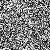

In [20]:
generate_GIF(array_list)

In [3]:
import numpy as np
from PIL import Image
import imageio

# Create a list of arrays (n x n)
array_list = []

# You can populate array_list with your own n x n arrays, e.g., random arrays
n = 100
for _ in range(100):
    random_array = np.random.randint(0, 256, size=(n, n), dtype=np.uint8)
    array_list.append(random_array)

# Function to convert an array to an image
def array_to_image(array):
    return Image.fromarray(array)

# Convert each array in the list to an image
image_list = [array_to_image(array) for array in array_list]

# Save individual images and create a GIF
output_path = "output.gif"
imageio.mimsave(output_path, image_list, duration=0.2)  # Adjust the duration as needed (in seconds)

# Display or save the GIF
# imageio.mimwrite(output_path, image_list, duration=0.2)  # Uncomment this line if you want to save the GIF

print("GIF created at:", output_path)


GIF created at: output.gif
